<a href="https://colab.research.google.com/github/KrishVM-4687/Python-DAV-Projects/blob/main/Customer_Orders.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Requirements

There are three datasets

1. Order Book
2. Customer Master
3. Product Master

What we need to do?

1. We need to combine these three
2. Add a new column "Order Value" Calculate Order Value for each order
3. Find Transaction ID with Highest Order Value
4. Find Customer with Highest Order Value
5. Find Customer with Highest purchases
6. Quarter wise purchases and quarter over quarter trend
7. Split Customer Names into First name and Last Name


# Load Data into Pandas Dataframe

In [2]:
!gdown 11pM7Wv5fUFSUpM6BIEeAeD7zkLuTBf8c

Downloading...
From: https://drive.google.com/uc?id=11pM7Wv5fUFSUpM6BIEeAeD7zkLuTBf8c
To: /content/Order Book.csv
100% 34.1k/34.1k [00:00<00:00, 45.3MB/s]


In [4]:
Order_Book = pd.read_csv('Order Book.csv')

In [5]:
Order_Book.head()

,transaction_id,product_id,date,quantity,customer_id
0,O0001,10005,01-01-2025,1,S192557
1,O0002,10027,01-01-2025,1,S186365
2,O0003,10006,01-01-2025,1,S184289
3,O0004,10019,01-01-2025,3,S185246
4,O0005,10012,01-01-2025,3,S190175


In [6]:
!gdown 1Ny1uhPWH0hxmBRk5Xm4XPt0bIhe22loz

Downloading...
From: https://drive.google.com/uc?id=1Ny1uhPWH0hxmBRk5Xm4XPt0bIhe22loz
To: /content/Customer Master.csv
100% 548/548 [00:00<00:00, 1.92MB/s]


In [7]:
Customer_Master = pd.read_csv('Customer Master.csv')

In [8]:
Customer_Master.head()

,customer_id,customer_name,age,gender,city
0,S191974,Angel Caroline,30,F,Mumbai
1,S185246,Darshini Anand,45,F,Bangalore
2,S185521,Prakash Chandra,33,M,Hyderabad
3,S184289,Charan Sahoo,37,M,Pune
4,S192557,Deepika Anil,39,F,Mumbai


In [9]:
!gdown 1DKmWQdKrKGaZPTgeqpiSdCwEjKGsQgsf

Downloading...
From: https://drive.google.com/uc?id=1DKmWQdKrKGaZPTgeqpiSdCwEjKGsQgsf
To: /content/Product Master.csv
100% 1.14k/1.14k [00:00<00:00, 3.28MB/s]


In [10]:
Product_Master = pd.read_csv('Product Master.csv')

In [11]:
Product_Master.head()

,product_id,product_name,category,price
0,10001,Mattress,Furniture,45000
1,10002,Sofaset,Furniture,75000
2,10003,Recliner,Furniture,50000
3,10004,Wardrobe,Furniture,60000
4,10005,Executive Chair,Furniture,10000


# Data Overview

In [12]:
Order_Book.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   transaction_id  1000 non-null   object
 1   product_id      1000 non-null   int64 
 2   date            1000 non-null   object
 3   quantity        1000 non-null   int64 
 4   customer_id     1000 non-null   object
dtypes: int64(2), object(3)
memory usage: 39.2+ KB


In [13]:
Customer_Master.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customer_id    14 non-null     object
 1   customer_name  14 non-null     object
 2   age            14 non-null     int64 
 3   gender         14 non-null     object
 4   city           14 non-null     object
dtypes: int64(1), object(4)
memory usage: 692.0+ bytes


In [15]:
Product_Master.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   product_id    35 non-null     int64 
 1   product_name  35 non-null     object
 2   category      35 non-null     object
 3   price         35 non-null     int64 
dtypes: int64(2), object(2)
memory usage: 1.2+ KB


**Observation**: info() showed that there no null values in each of the three data frames.

In [19]:
Order_Book.isnull()

,transaction_id,product_id,date,quantity,customer_id
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
995,False,False,False,False,False
996,False,False,False,False,False
997,False,False,False,False,False
998,False,False,False,False,False


In [20]:
Customer_Master.isnull()

,customer_id,customer_name,age,gender,city
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
5,False,False,False,False,False
6,False,False,False,False,False
7,False,False,False,False,False
8,False,False,False,False,False
9,False,False,False,False,False


In [21]:
Product_Master.isnull()

,product_id,product_name,category,price
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,False,False
5,False,False,False,False
6,False,False,False,False
7,False,False,False,False
8,False,False,False,False
9,False,False,False,False


**Observation**: made sure that there are no null values using isnull()

In [22]:
Order_Book.describe()

,product_id,quantity
count,1000.00000,1000.00000
mean,10017.94600,1.71800
std,10.17313,1.25939
min,10001.00000,1.00000
25%,10009.00000,1.00000
50%,10018.00000,1.00000
75%,10027.00000,2.00000
max,10035.00000,5.00000


In [23]:
Customer_Master.describe()

,age
count,14.000000
mean,41.214286
std,6.399262
min,30.000000
25%,37.500000
50%,41.500000
75%,46.500000
max,50.000000


In [24]:
Product_Master.describe()

,product_id,price
count,35.000000,35.000000
mean,10018.000000,14238.114286
std,10.246951,26053.098253
min,10001.000000,100.000000
25%,10009.500000,674.500000
50%,10018.000000,1199.000000
75%,10026.500000,8175.000000
max,10035.000000,100000.000000


In [28]:
Order_Book.shape

(1000, 5)

In [29]:
Customer_Master.shape

(14, 5)

In [30]:
Product_Master.shape

(35, 4)

# Data Analysis

**We need to combine these three**

In [37]:
df = pd.merge(Order_Book, Customer_Master, on='customer_id')

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   transaction_id  1000 non-null   object
 1   product_id      1000 non-null   int64 
 2   date            1000 non-null   object
 3   quantity        1000 non-null   int64 
 4   customer_id     1000 non-null   object
 5   customer_name   1000 non-null   object
 6   age             1000 non-null   int64 
 7   gender          1000 non-null   object
 8   city            1000 non-null   object
dtypes: int64(3), object(6)
memory usage: 70.4+ KB


In [40]:
df = pd.merge(df, Product_Master, on='product_id')

In [41]:
df.head()

,transaction_id,product_id,date,quantity,customer_id,customer_name,age,gender,city,product_name,category,price
0,O0001,10005,01-01-2025,1,S192557,Deepika Anil,39,F,Mumbai,Executive Chair,Furniture,10000
1,O0002,10027,01-01-2025,1,S186365,Indumathy J,44,F,Hyderabad,Belt,Accessories,249
2,O0003,10006,01-01-2025,1,S184289,Charan Sahoo,37,M,Pune,Dining Set,Furniture,100000
3,O0004,10019,01-01-2025,3,S185246,Darshini Anand,45,F,Bangalore,Skirt,Fashion,1199
4,O0005,10012,01-01-2025,3,S190175,Priya Dandekar,45,F,Mumbai,Shampoo,Beauty,500


In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   transaction_id  1000 non-null   object
 1   product_id      1000 non-null   int64 
 2   date            1000 non-null   object
 3   quantity        1000 non-null   int64 
 4   customer_id     1000 non-null   object
 5   customer_name   1000 non-null   object
 6   age             1000 non-null   int64 
 7   gender          1000 non-null   object
 8   city            1000 non-null   object
 9   product_name    1000 non-null   object
 10  category        1000 non-null   object
 11  price           1000 non-null   int64 
dtypes: int64(4), object(8)
memory usage: 93.9+ KB


**Observation**: We can see that df became a large dataset convenient for analysis based on three individual datasets with common columns

**Add a new column "Order Value" Calculate Order Value for each order**

In [43]:
df['Order_value'] = df['quantity'] * df['price']

In [44]:
df.head()

,transaction_id,product_id,date,quantity,customer_id,customer_name,age,gender,city,product_name,category,price,Order_value
0,O0001,10005,01-01-2025,1,S192557,Deepika Anil,39,F,Mumbai,Executive Chair,Furniture,10000,10000
1,O0002,10027,01-01-2025,1,S186365,Indumathy J,44,F,Hyderabad,Belt,Accessories,249,249
2,O0003,10006,01-01-2025,1,S184289,Charan Sahoo,37,M,Pune,Dining Set,Furniture,100000,100000
3,O0004,10019,01-01-2025,3,S185246,Darshini Anand,45,F,Bangalore,Skirt,Fashion,1199,3597
4,O0005,10012,01-01-2025,3,S190175,Priya Dandekar,45,F,Mumbai,Shampoo,Beauty,500,1500


**Find Transaction ID with Highest Order Value**

In [46]:
# Find the index of the row with the highest 'value'
max_value_index = df['Order_value'].idxmax()

# Get the entire row using the identified index
highest_transaction_row = df.loc[max_value_index]

print(highest_transaction_row)

transaction_id           O0003
product_id               10006
date                01-01-2025
quantity                     1
customer_id            S184289
customer_name     Charan Sahoo
age                         37
gender                       M
city                      Pune
product_name        Dining Set
category             Furniture
price                   100000
Order_value             100000
Name: 2, dtype: object


In [47]:
highest_value_transaction_id = df.loc[max_value_index, 'transaction_id']
print(highest_value_transaction_id)

O0003


**Find Customer with Highest Order Value**

In [48]:
highest_value_customer = df.loc[max_value_index, 'customer_name']
print(highest_value_customer)

Charan Sahoo


**Find Customer with Highest purchases**

In [49]:
# Create a new DataFrame with total order value per customer
customer_total_orders = df.groupby('customer_id')['Order_value'].sum().reset_index()

# Display the new DataFrame
print(customer_total_orders)


   customer_id  Order_value
0      S184289      1333798
1      S185246      1077634
2      S185521      1260783
3      S186365       956358
4      S186382       926289
5      S186649      1116299
6      S188268      1245555
7      S189119      1033323
8      S189169       969947
9      S189411      1136955
10     S190175       826250
11     S191774      1185695
12     S191974       975045
13     S192557      1411982


In [50]:
customer_total_orders = pd.merge(customer_total_orders, Customer_Master, on='customer_id')

In [51]:
customer_total_orders.head()

,customer_id,Order_value,customer_name,age,gender,city
0,S184289,1333798,Charan Sahoo,37,M,Pune
1,S185246,1077634,Darshini Anand,45,F,Bangalore
2,S185521,1260783,Prakash Chandra,33,M,Hyderabad
3,S186365,956358,Indumathy J,44,F,Hyderabad
4,S186382,926289,Ganesh Shankar,47,M,Chennai


In [52]:
max_purchase_index = customer_total_orders['Order_value'].idxmax()
highest_purchase_customer = customer_total_orders.loc[max_purchase_index, 'customer_name']
print(highest_purchase_customer)

Deepika Anil


In [53]:
highest_purchase_row = customer_total_orders.loc[max_purchase_index]

print(highest_purchase_row)

customer_id           S192557
Order_value           1411982
customer_name    Deepika Anil
age                        39
gender                      F
city                   Mumbai
Name: 13, dtype: object


**Quarter wise purchases and quarter over quarter trend**

In [55]:
df.head()

,transaction_id,product_id,date,quantity,customer_id,customer_name,age,gender,city,product_name,category,price,Order_value
0,O0001,10005,01-01-2025,1,S192557,Deepika Anil,39,F,Mumbai,Executive Chair,Furniture,10000,10000
1,O0002,10027,01-01-2025,1,S186365,Indumathy J,44,F,Hyderabad,Belt,Accessories,249,249
2,O0003,10006,01-01-2025,1,S184289,Charan Sahoo,37,M,Pune,Dining Set,Furniture,100000,100000
3,O0004,10019,01-01-2025,3,S185246,Darshini Anand,45,F,Bangalore,Skirt,Fashion,1199,3597
4,O0005,10012,01-01-2025,3,S190175,Priya Dandekar,45,F,Mumbai,Shampoo,Beauty,500,1500


In [58]:
# Extract the quarter and add it as a new column
df['Quarter'] = df['date'].dt.Quarter

AttributeError: Can only use .dt accessor with datetimelike values

**Observation**: date is in dd-mm-yyyy format. pandas would recongize date in yyyy-mm-dd format. in order to find out quarter, we need to convert date from dd-mm-yyyy format to yyyy-mm-dd format

In [59]:
#Convert 'Date' column to datetime objects
df['date'] = pd.to_datetime(df['date'], format='%d-%m-%Y')

In [61]:
df.head()

,transaction_id,product_id,date,quantity,customer_id,customer_name,age,gender,city,product_name,category,price,Order_value
0,O0001,10005,2025-01-01,1,S192557,Deepika Anil,39,F,Mumbai,Executive Chair,Furniture,10000,10000
1,O0002,10027,2025-01-01,1,S186365,Indumathy J,44,F,Hyderabad,Belt,Accessories,249,249
2,O0003,10006,2025-01-01,1,S184289,Charan Sahoo,37,M,Pune,Dining Set,Furniture,100000,100000
3,O0004,10019,2025-01-01,3,S185246,Darshini Anand,45,F,Bangalore,Skirt,Fashion,1199,3597
4,O0005,10012,2025-01-01,3,S190175,Priya Dandekar,45,F,Mumbai,Shampoo,Beauty,500,1500


In [62]:
#Extract the quarter and create a new column
df['Quarter'] = df['date'].dt.quarter

In [63]:
df.head()

,transaction_id,product_id,date,quantity,customer_id,customer_name,age,gender,city,product_name,category,price,Order_value,Quarter
0,O0001,10005,2025-01-01,1,S192557,Deepika Anil,39,F,Mumbai,Executive Chair,Furniture,10000,10000,1
1,O0002,10027,2025-01-01,1,S186365,Indumathy J,44,F,Hyderabad,Belt,Accessories,249,249,1
2,O0003,10006,2025-01-01,1,S184289,Charan Sahoo,37,M,Pune,Dining Set,Furniture,100000,100000,1
3,O0004,10019,2025-01-01,3,S185246,Darshini Anand,45,F,Bangalore,Skirt,Fashion,1199,3597,1
4,O0005,10012,2025-01-01,3,S190175,Priya Dandekar,45,F,Mumbai,Shampoo,Beauty,500,1500,1


In [64]:
# Create a new DataFrame with total order value per customer
quarterly_sales = df.groupby('Quarter')['Order_value'].sum().reset_index()

# Display the new DataFrame
print(quarterly_sales)

   Quarter  Order_value
0        1     15455913


In [65]:
df['Month'] = df['date'].dt.month

In [66]:
df.head()

,transaction_id,product_id,date,quantity,customer_id,customer_name,age,gender,city,product_name,category,price,Order_value,Quarter,Month
0,O0001,10005,2025-01-01,1,S192557,Deepika Anil,39,F,Mumbai,Executive Chair,Furniture,10000,10000,1,1
1,O0002,10027,2025-01-01,1,S186365,Indumathy J,44,F,Hyderabad,Belt,Accessories,249,249,1,1
2,O0003,10006,2025-01-01,1,S184289,Charan Sahoo,37,M,Pune,Dining Set,Furniture,100000,100000,1,1
3,O0004,10019,2025-01-01,3,S185246,Darshini Anand,45,F,Bangalore,Skirt,Fashion,1199,3597,1,1
4,O0005,10012,2025-01-01,3,S190175,Priya Dandekar,45,F,Mumbai,Shampoo,Beauty,500,1500,1,1


In [67]:
# Create a new DataFrame with total order value per customer
monthly_sales = df.groupby('Month')['Order_value'].sum().reset_index()

# Display the new DataFrame
print(monthly_sales)

   Month  Order_value
0      1      5928436
1      2      4641527
2      3      4885950


In [68]:
# Create a new DataFrame with total order value per customer
monthly_sales_by_category = df.groupby(['Month','category'])['Order_value'].sum().reset_index()

# Display the new DataFrame
print(monthly_sales_by_category)

    Month     category  Order_value
0       1  Accessories       119273
1       1   Appliances      1219000
2       1       Beauty        86700
3       1      Fashion       169240
4       1     Footwear        47251
5       1    Furniture      4180000
6       1      Luggage       106972
7       2  Accessories        74425
8       2   Appliances      1077000
9       2       Beauty        72300
10      2      Fashion       116875
11      2     Footwear        45955
12      2    Furniture      3160000
13      2      Luggage        94972
14      3  Accessories        69118
15      3   Appliances      1066000
16      3       Beauty        92900
17      3      Fashion       176915
18      3     Footwear        50547
19      3    Furniture      3325000
20      3      Luggage       105470


# Data Visualization

**Monthly Trend of Total Sales**

In [69]:
monthly_sales.head()

,Month,Order_value
0,1,5928436
1,2,4641527
2,3,4885950


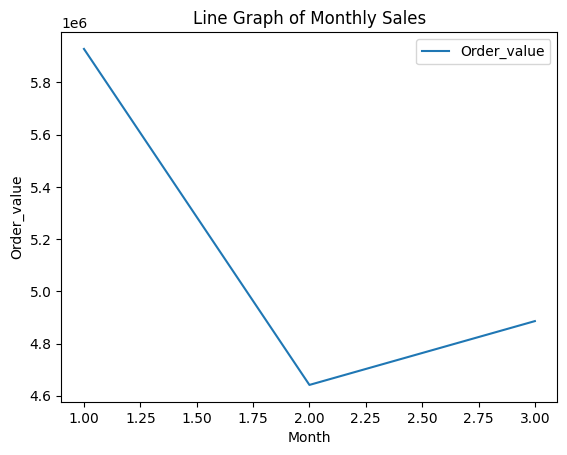

In [72]:
    # Plotting 'Value_A' against 'Date'
    monthly_sales.plot(kind='line', x='Month', y='Order_value')

    # Adding a title and labels for clarity
    plt.title('Line Graph of Monthly Sales')
    plt.xlabel('Month')
    plt.ylabel('Order_value')

    # Display the plot
    plt.show()

**Observation**: X Axis Month is considering numerical value instead of Month name. we will add a column in monthly sales dataset to show Jan Feb Mar etc.

In [73]:
# Create a mapping dictionary
month_mapping = {
    1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr',
    5: 'May', 6: 'Jun', 7: 'Jul', 8: 'Aug',
    9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'
}

# Apply the mapping to the 'Month' column
monthly_sales['Month_Name'] = monthly_sales['Month'].map(month_mapping)

print(monthly_sales)

   Month  Order_value Month_Name
0      1      5928436        Jan
1      2      4641527        Feb
2      3      4885950        Mar


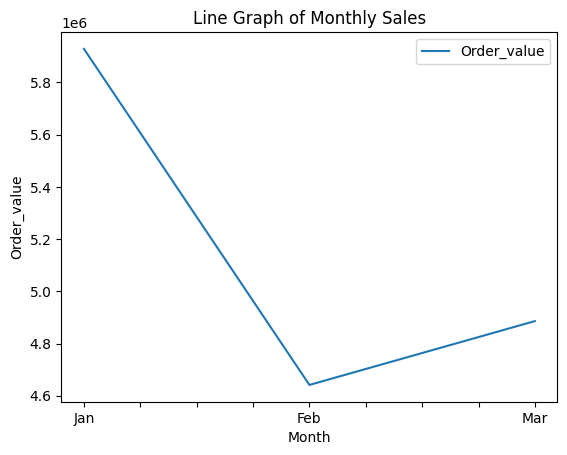

In [74]:
    # Plotting 'Value_A' against 'Date'
    monthly_sales.plot(kind='line', x='Month_Name', y='Order_value')

    # Adding a title and labels for clarity
    plt.title('Line Graph of Monthly Sales')
    plt.xlabel('Month')
    plt.ylabel('Order_value')

    # Display the plot
    plt.show()

**Monthly Trend of Total Sales by Category**

In [75]:
monthly_sales_by_category.head()

,Month,category,Order_value
0,1,Accessories,119273
1,1,Appliances,1219000
2,1,Beauty,86700
3,1,Fashion,169240
4,1,Footwear,47251


In [76]:
# Apply the mapping to the 'Month' column
monthly_sales_by_category['Month_Name'] = monthly_sales_by_category['Month'].map(month_mapping)

print(monthly_sales_by_category)

    Month     category  Order_value Month_Name
0       1  Accessories       119273        Jan
1       1   Appliances      1219000        Jan
2       1       Beauty        86700        Jan
3       1      Fashion       169240        Jan
4       1     Footwear        47251        Jan
5       1    Furniture      4180000        Jan
6       1      Luggage       106972        Jan
7       2  Accessories        74425        Feb
8       2   Appliances      1077000        Feb
9       2       Beauty        72300        Feb
10      2      Fashion       116875        Feb
11      2     Footwear        45955        Feb
12      2    Furniture      3160000        Feb
13      2      Luggage        94972        Feb
14      3  Accessories        69118        Mar
15      3   Appliances      1066000        Mar
16      3       Beauty        92900        Mar
17      3      Fashion       176915        Mar
18      3     Footwear        50547        Mar
19      3    Furniture      3325000        Mar
20      3    

In [78]:
monthly_sales_by_category.drop(columns="Month")


,category,Order_value,Month_Name
0,Accessories,119273,Jan
1,Appliances,1219000,Jan
2,Beauty,86700,Jan
3,Fashion,169240,Jan
4,Footwear,47251,Jan
5,Furniture,4180000,Jan
6,Luggage,106972,Jan
7,Accessories,74425,Feb
8,Appliances,1077000,Feb
9,Beauty,72300,Feb


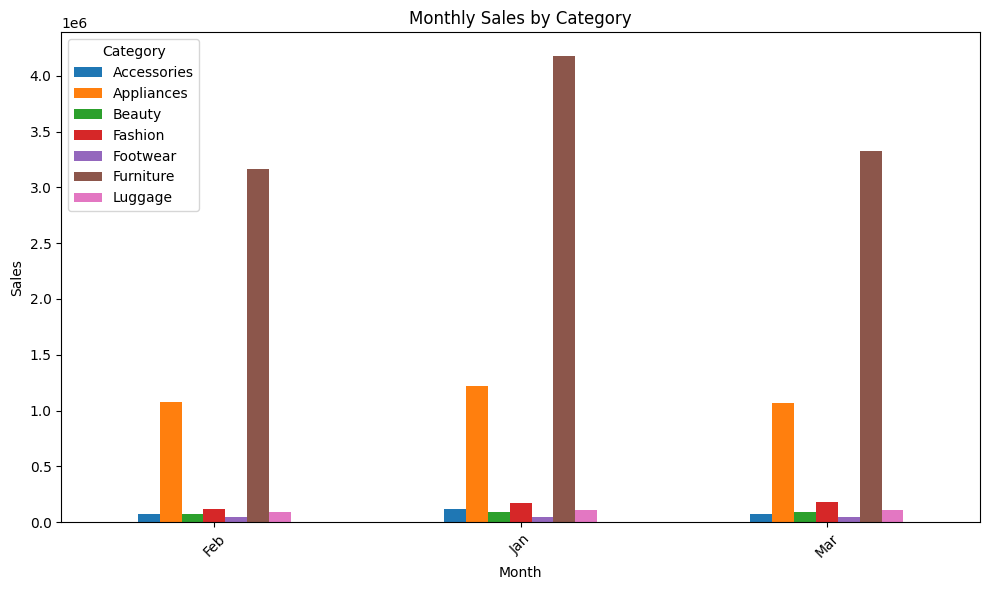

In [80]:
# Pivot the data for easier plotting
pivot_df = monthly_sales_by_category.pivot(index='Month_Name', columns='category', values='Order_value')

pivot_df.plot(kind='bar', figsize=(10, 6))
plt.title('Monthly Sales by Category')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.xticks(rotation=45)
plt.legend(title='Category')
plt.tight_layout()
plt.show()